# Stations to be used for model evaluation

Station coordinates and sources gathered in: https://docs.google.com/spreadsheets/d/1UF5I5zyFDv2ucvm8AOHLB9DEjY9Q3sarYHAXSunIX3s/edit?usp=sharing

In [1]:
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np

from salishsea_tools import (
    nc_tools,
    viz_tools,
)
import datetime
import matplotlib
from mpl_toolkits.basemap import Basemap, cm
import cmocean
import datetime
import stations
import csv
import seaborn as sns
import matplotlib.image as mpimg

%matplotlib inline

/ocean/brogalla/GEOTRACES/analysis-birgit/cmocean-master/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


In [2]:
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})

In [3]:
CAA1 = stations.CAA1()
CAA2 = stations.CAA2()
CAA3 = stations.CAA3()
CAA4 = stations.CAA4()
CAA5 = stations.CAA5()
CAA6 = stations.CAA6()
CAA7 = stations.CAA7()
CAA8 = stations.CAA8()
CAA9 = stations.CAA9()
CB1 = stations.CB1()
CB2 = stations.CB2()
CB3 = stations.CB3()
CB4 = stations.CB4()
BB1 = stations.BB1()
BB2 = stations.BB2()
BB3 = stations.BB3()
K1 = stations.K1()
LS2 = stations.LS2()

In [4]:
names = ['CAA1', 'CAA2', 'CAA3', 'CAA4', 'CAA5', 'CAA6', 'CAA7', 'CAA8', 'CAA9', \
         'CB1', 'CB2', 'CB3', 'CB4', 'BB1', 'BB2', 'BB3', 'K1', 'LS2']
lon_manuel = [CAA1.lon, CAA2.lon, CAA3.lon, CAA4.lon, CAA5.lon, CAA6.lon, CAA7.lon, CAA8.lon, CAA9.lon, \
        CB1.lon, CB2.lon, CB3.lon, CB4.lon, BB1.lon, BB2.lon, BB3.lon, K1.lon, LS2.lon]
lat_manuel = [CAA1.lat, CAA2.lat, CAA3.lat, CAA4.lat, CAA5.lat, CAA6.lat, CAA7.lat, CAA8.lat, CAA9.lat, \
        CB1.lat, CB2.lat, CB3.lat, CB4.lat, BB1.lat, BB2.lat, BB3.lat, K1.lat, LS2.lat]

Landmask:

In [5]:
mask = nc.Dataset('/ocean/brogalla/GEOTRACES/data/ANHA12_mask.nc')
tmask = mask.variables['tmask']
tmask = np.array(tmask[0,:,:,:])
mlons = mask.variables['nav_lon']
mlats = mask.variables['nav_lat']
mlons = np.array(mlons)
mlats = np.array(mlats)
cond = (tmask > 0.1) 
Z_masked = np.ma.masked_where(cond, tmask) 

In [6]:
mesh = nc.Dataset('/ocean/brogalla/GEOTRACES/analysis-birgit/notebooks/ANHA12/ANHA12_mesh1.nc')
mesh_lon = mesh.variables['nav_lon']
mesh_lat = mesh.variables['nav_lat']
mesh_bathy = mesh.variables['hdept'][0]

In [7]:
mesh_lon = np.array(mesh_lon)
mesh_lat = np.array(mesh_lat)
mesh_bathy = np.array(mesh_bathy)

Campbell and Yeats, 1982:

In [8]:
lat_1982 = [66.7567, 66.7483, 72.235, 74.333, 74.1783, 76.35167, 76.393, 78.32, 78.315, 66.7583]
lon_1982 = [-57.095, -60.25167, -65.9483, -94.263, -94.2433, -89.43, -89.305, -74.7167, \
           -74.2667, -57.0617]

Yeats and Westerlund (1991): 

In [9]:
lat_1991 = [81.723]
lon_1991 = [-93.4167]

Yeats (1988):

In [10]:
lat_1988 = [82, 86]
lon_1988 = [6, -111]

Nakayama et al. (2011):

In [11]:
lat_2011 = [73.4]
lon_2011 = [-152]

Charters (2012):

In [12]:
lat_2012 = [71.115, 72.51, 73.32, 74.393, 75.28, 71.183]
lon_2012 = [-139.33167, -136.59167, -139.39, -136.16, -137.56, -132.943]

Veron et al. (1999):

In [13]:
lat_1999 = [54.5]
lon_1999 = [-48.5]

Rijkenberg et al. (2014):

In [14]:
lat_2014 = [58.6022, 54.0634, 51.8209, 49.722, 47.8, 46.3119, 44.8423]
lon_2014 = [320.29309-360, 314.16479-360, 314.26849-360, 317.5531-360, \
            320.60049-360, 320.34161-360, 317.46851-360]

# Plot:

In [15]:
plt.rcParams['font.family'] = 'arial'

/home/brogalla/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1698: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/home/brogalla/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3342: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/brogalla/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3381: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/home/brogalla/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/brogalla/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is d

Text(0.5,1,'Mn, Fe, and Pb sample stations')

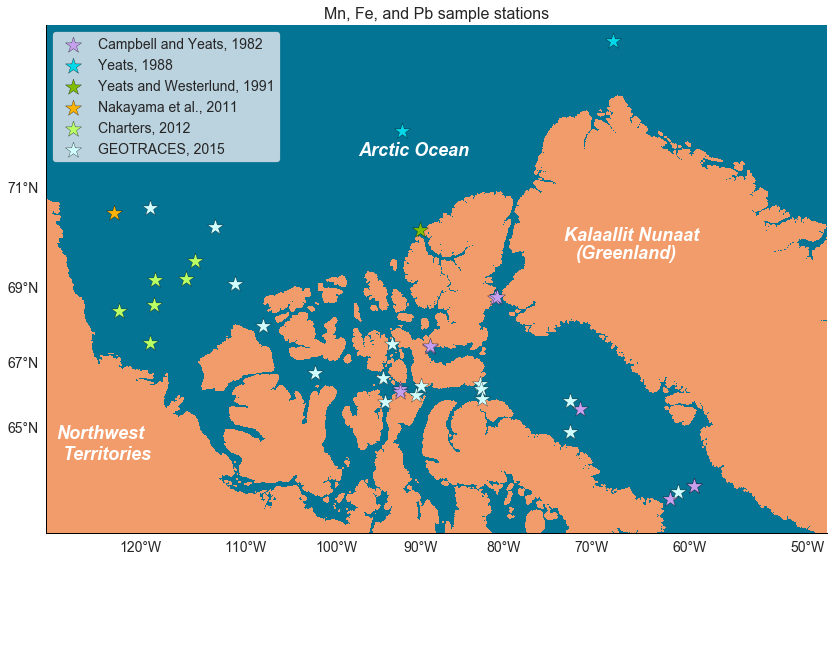

In [16]:
fig,ax = plt.subplots(figsize=(14,10))

proj=Basemap(projection='eqdc',lat_0 = 79.5, lon_0 = -88, resolution='i', width=4.0e6, height=2.6e6)
proj.drawparallels(np.arange(int(65),int(90),2),labels=[1,0,0,0], linewidth=0.0, fontsize=14)
proj.drawmeridians(np.arange(int(-140),int(-30),10),labels=[0,0,0,1], linewidth=0.0, fontsize=14)

sns.despine()

# bathymetry:
# x_mesh, y_mesh = proj(mesh_lon, mesh_lat)
# bath = proj.contourf(x_mesh, y_mesh, mesh_bathy,12, cmap=cmocean.cm.tempo)
# proj.shadedrelief()
proj.drawmapboundary(fill_color=sns.xkcd_rgb['sea blue'])

# apply land mask:
x2, y2 = proj(mlons, mlats)
z2 = Z_masked[0,:,:]
proj.pcolor(x2,y2,z2, vmin=-1, vmax = 0.3, cmap=cmocean.cm.matter_r)

x_1982, y_1982 = proj(lon_1982, lat_1982)
proj.scatter(x_1982, y_1982, marker='*',s=280,zorder=2, c=sns.xkcd_rgb['lavender'], \
             edgecolor='k', label= 'Campbell and Yeats, 1982')

x_1988, y_1988 = proj(lon_1988, lat_1988)
proj.scatter(x_1988, y_1988, marker='*',s=280,zorder=2, c=sns.xkcd_rgb['aqua blue'], \
             edgecolor='k', label= 'Yeats, 1988')

x_1991, y_1991 = proj(lon_1991, lat_1991)
proj.scatter(x_1991, y_1991, marker='*',s=280,zorder=2, c=sns.xkcd_rgb['dark lime green'], \
             edgecolor='k', label= 'Yeats and Westerlund, 1991')

# x_1999, y_1999 = proj(lon_1999, lat_1999)
# proj.scatter(x_1999, y_1999, marker='*',s=280,zorder=2, edgecolor='k', label= 'Veron et al., 1999')

x_2011, y_2011 = proj(lon_2011, lat_2011)
proj.scatter(x_2011, y_2011, marker='*',s=280,zorder=2, c=sns.xkcd_rgb['amber'], \
             edgecolor='k', label= 'Nakayama et al., 2011')
    
x_2012, y_2012 = proj(lon_2012, lat_2012)
proj.scatter(x_2012, y_2012, marker='*',s=280,zorder=2, c=sns.xkcd_rgb['light lime green'], \
             edgecolor='k', label= 'Charters, 2012')

# x_2014, y_2014 = proj(lon_2014, lat_2014)
# proj.scatter(x_2014, y_2014, marker='*',s=280,zorder=2, edgecolor='k', label= 'Rijkenberg et al., 2014')

x_man, y_man = proj(lon_manuel, lat_manuel)
proj.scatter(x_man, y_man, marker='*',s=280,zorder=2, c=sns.xkcd_rgb['pale blue'], \
             edgecolor='k', label= 'GEOTRACES, 2015')

# features:
textx, texty = proj(lon_features, lat_features)
for i in range(len(features)):
    plt.text(textx[i], texty[i], features[i], fontsize=18, fontweight='bold', fontstyle='italic', color='w')

#---------------------
    
# cbaxes = fig.add_axes([0.975, 0.15, 0.02, 0.7]) 

l = ax.legend(fontsize=14,loc=2, frameon=True)
ax.set_title('Mn, Fe, and Pb sample stations', fontsize=16)
# CBar = plt.colorbar(bath, ax=ax, cax=cbaxes) 
# a = CBar.set_label('Ocean depth [m]', fontsize=16)
# CBar.ax.tick_params(axis='y', length=0, labelsize=16)
# fig.savefig('eval_stations.png', bbox_inches='tight')

/home/brogalla/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1698: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/home/brogalla/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3342: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/brogalla/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3381: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/home/brogalla/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/brogalla/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is d

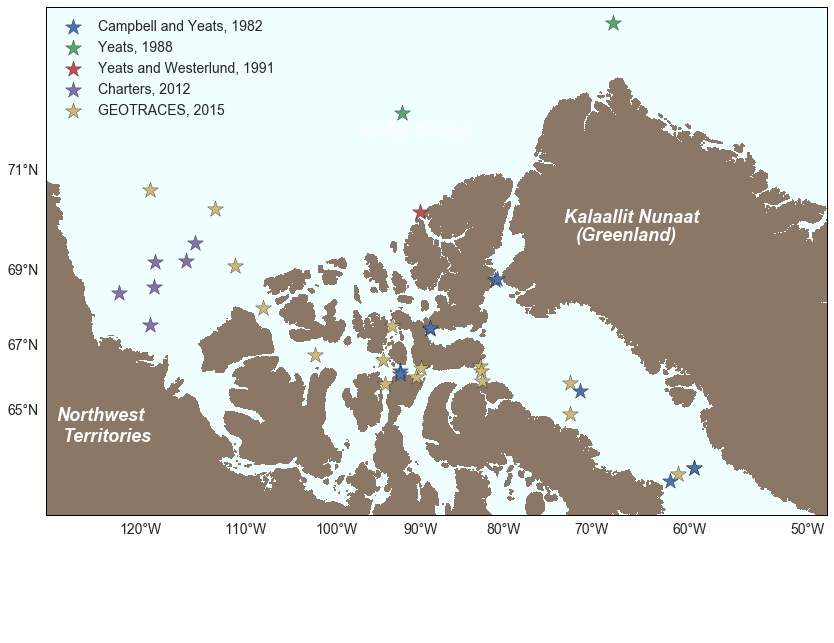

In [15]:
fig,ax = plt.subplots(figsize=(14,10))

proj=Basemap(projection='eqdc',lat_0 = 79.5, lon_0 = -88, resolution='i', width=4.0e6, height=2.6e6)
proj.drawparallels(np.arange(int(65),int(90),2),labels=[1,0,0,0], linewidth=0.0, fontsize=14)
proj.drawmeridians(np.arange(int(-140),int(-30),10),labels=[0,0,0,1], linewidth=0.0, fontsize=14)

sns.set_palette("husl")

# bathymetry:
# x_mesh, y_mesh = proj(mesh_lon, mesh_lat)
# bath = proj.contourf(x_mesh, y_mesh, mesh_bathy,12, cmap=cmocean.cm.tempo)
# proj.shadedrelief()
proj.drawmapboundary(fill_color='azure')

# apply land mask:
x2, y2 = proj(mlons, mlats)
z2 = Z_masked[0,:,:]
cmap1 = matplotlib.colors.ListedColormap(["#8b7765"])
proj.pcolor(x2,y2,z2, vmin=-1, zorder=1, vmax = 0.3, cmap=cmap1)

x_1982, y_1982 = proj(lon_1982, lat_1982)
proj.scatter(x_1982, y_1982, marker='*',s=280,zorder=2, \
             edgecolor='k', label= 'Campbell and Yeats, 1982')

x_1988, y_1988 = proj(lon_1988, lat_1988)
proj.scatter(x_1988, y_1988, marker='*',s=280,zorder=2, \
             edgecolor='k', label= 'Yeats, 1988')

x_1991, y_1991 = proj(lon_1991, lat_1991)
proj.scatter(x_1991, y_1991, marker='*',s=280,zorder=2, \
             edgecolor='k', label= 'Yeats and Westerlund, 1991')

# x_1999, y_1999 = proj(lon_1999, lat_1999)
# proj.scatter(x_1999, y_1999, marker='*',s=280,zorder=2, edgecolor='k', label= 'Veron et al., 1999')

# x_2011, y_2011 = proj(lon_2011, lat_2011)
# proj.scatter(x_2011, y_2011, marker='*',s=280,zorder=2, \
#              edgecolor='k', label= 'Nakayama et al., 2011')
    
x_2012, y_2012 = proj(lon_2012, lat_2012)
proj.scatter(x_2012, y_2012, marker='*',s=280,zorder=2, \
             edgecolor='k', label= 'Charters, 2012')

# x_2014, y_2014 = proj(lon_2014, lat_2014)
# proj.scatter(x_2014, y_2014, marker='*',s=280,zorder=2, edgecolor='k', label= 'Rijkenberg et al., 2014')

x_man, y_man = proj(lon_manuel, lat_manuel)
proj.scatter(x_man, y_man, marker='*',s=280,zorder=2, \
             edgecolor='k', label= 'GEOTRACES, 2015')

# features:
textx, texty = proj(lon_features, lat_features)
for i in range(len(features)):
    plt.text(textx[i], texty[i], features[i], fontsize=18, fontweight='bold', fontstyle='italic', color='w')

#---------------------
    
# cbaxes = fig.add_axes([0.975, 0.15, 0.02, 0.7]) 

ax.legend(fontsize=14,loc=2)
# ax.set_title('Mn, Fe, and Pb sample stations', fontsize=16)
# CBar = plt.colorbar(bath, ax=ax, cax=cbaxes) 
# a = CBar.set_label('Ocean depth [m]', fontsize=16)
# CBar.ax.tick_params(axis='y', length=0, labelsize=16)
# fig.savefig('eval_stations2.png', bbox_inches='tight')

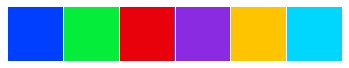

In [16]:
current_palette = sns.color_palette('bright')
sns.palplot(current_palette)

In [17]:
sns.set_palette("bright")

In [18]:
nv = mpimg.imread('./nunavut.png')
nwt = mpimg.imread('./NWT.png')

In [36]:
features = ['Arctic Ocean', 'Kalaallit Nunaat','Greenland', \
           'Northwest','Territories', 'Nunavut']
lon_features = [-129, -54, -54, \
                -132.5, -131.3, -105.5]
lat_features = [88, 79.5, 78.0, \
                64.1, 63.4, 64]

/home/brogalla/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/brogalla/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:4979: MatplotlibDeprecationWarning: The is_scalar function was deprecated in version 2.1.
  elif masked and is_scalar(masked):
/home/brogalla/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/brogalla/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/home/brogalla/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3608: Matplo

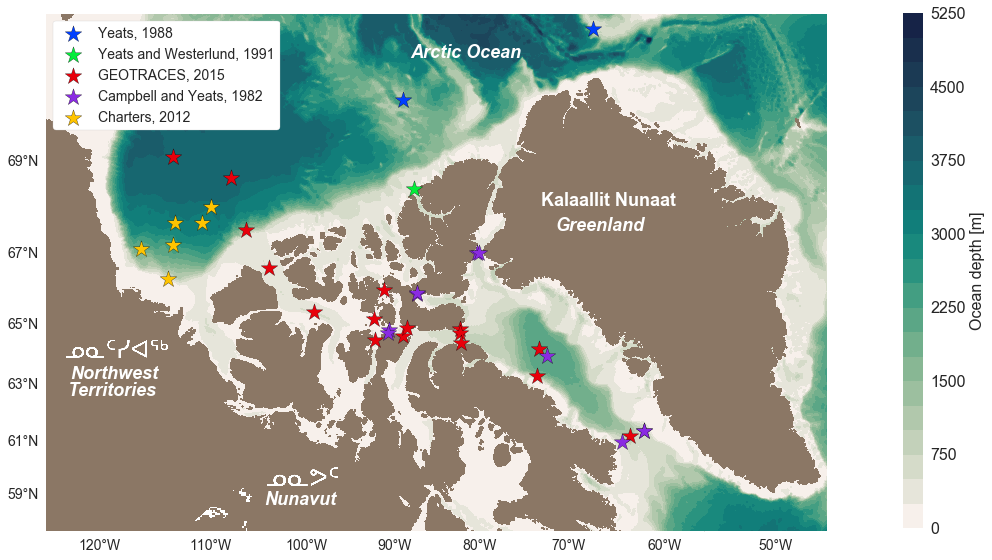

In [38]:
fig,ax = plt.subplots(figsize=(14,11))

proj=Basemap(projection='stere',lat_0 = 77.5, lon_0 = -85, resolution='i', width=4.5e6, height=2.98e6)
proj.drawparallels(np.arange(int(59),int(90),2),labels=[1,0,0,0], linewidth=0.0, fontsize=14)
proj.drawmeridians(np.arange(int(-140),int(-30),10),labels=[0,0,0,1], linewidth=0.0, fontsize=14)
proj.drawlsmask(land_color = "#8b7765", ocean_color="none", resolution = 'l')

# bathymetry:
# clevels=[0, 200, 400, 600, 800, 1000, 2000, 3000, 4500]
clevels=20
x_mesh, y_mesh = proj(mesh_lon, mesh_lat)
bath = proj.contourf(x_mesh, y_mesh, mesh_bathy,clevels, cmap=cmocean.cm.tempo)

# apply land mask:
x2, y2 = proj(mlons, mlats)
z2 = Z_masked[0,:,:]
cmap1 = matplotlib.colors.ListedColormap(["#8b7765"])
proj.pcolor(x2,y2,z2, vmin=-1, zorder=1, vmax = 0.3, cmap=cmap1)

x_1988, y_1988 = proj(lon_1988, lat_1988)
proj.scatter(x_1988, y_1988, marker='*',s=300,zorder=2, \
             edgecolor='k', label= 'Yeats, 1988')    
x_1991, y_1991 = proj(lon_1991, lat_1991)
proj.scatter(x_1991, y_1991, marker='*',s=300,zorder=2, \
             edgecolor='k', label= 'Yeats and Westerlund, 1991')

x_man, y_man = proj(lon_manuel, lat_manuel)
proj.scatter(x_man, y_man, marker='*',s=300,zorder=2, \
             edgecolor='k', label= 'GEOTRACES, 2015')

x_1982, y_1982 = proj(lon_1982, lat_1982)
proj.scatter(x_1982, y_1982, marker='*',s=300,zorder=2, \
             edgecolor='k', label= 'Campbell and Yeats, 1982')

x_2012, y_2012 = proj(lon_2012, lat_2012)
proj.scatter(x_2012, y_2012, marker='*',s=300,zorder=2, \
             edgecolor='k', label= 'Charters, 2012')


# features:
textx, texty = proj(lon_features, lat_features)
for i in range(len(features)):
    if features[i] == 'Kalaallit Nunaat':
        plt.text(textx[i], texty[i], features[i], fontsize=18, fontweight='bold', color='w')
    else:
        plt.text(textx[i], texty[i], features[i], fontsize=18, fontweight='bold', fontstyle='italic', color='w')

#nunavut:
ax3 = fig.add_axes([0.34, 0.22, 0.08, 0.05])
ax3.axis('off')
ax3.imshow(nv)
#northwest territories:
ax4 = fig.add_axes([0.14, 0.38, 0.11, 0.05])
ax4.axis('off')
ax4.imshow(nwt)
#---------------------
    
cbaxes = fig.add_axes([0.975, 0.18, 0.02, 0.65]) 

CBar = plt.colorbar(bath, ax=ax, cax=cbaxes) 
a = CBar.set_label('Ocean depth [m]', fontsize=16)
CBar.ax.tick_params(axis='y', length=0, labelsize=16)
ax.legend(fontsize=14,loc=2,frameon=True, facecolor="white", framealpha=1)

fig.savefig('CAA_sub-domain_eval2.png', bbox_inches='tight')